<a href="https://colab.research.google.com/github/cs20m016/cs6910-Assignment-2/blob/main/PartA%5B1_2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qq
import wandb

     |████████████████████████████████| 2.1MB 12.6MB/s 
     |████████████████████████████████| 102kB 5.9MB/s 
     |████████████████████████████████| 133kB 46.8MB/s 
     |████████████████████████████████| 163kB 53.4MB/s 
     |████████████████████████████████| 71kB 3.8MB/s 


In [2]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os, random
import matplotlib.gridspec as gridspec
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
train_path = '/content/drive/MyDrive/Assignment2DeepLearning/nature_12K/inaturalist_12K/train' 
test_path = '/content/drive/MyDrive/Assignment2DeepLearning/nature_12K/inaturalist_12K/val'

In [ ]:
# !unzip /content/drive/MyDrive/nature_12K.zip > /dev/null

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# train_path='/content/inaturalist_12K/train'

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10041 files belonging to 10 classes.
Using 9037 files for training.


In [19]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10041 files belonging to 10 classes.
Using 1004 files for validation.


In [8]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [9]:
ag_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [10]:
class_names = train_ds.class_names
print(class_names)

['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']


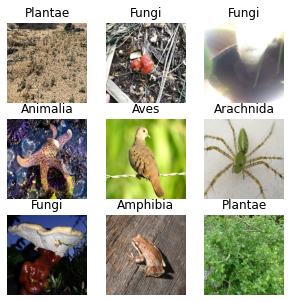

In [11]:
#first 9 images in training dataset
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

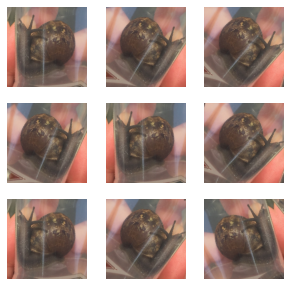

In [12]:
plt.figure(figsize=(5, 5))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
def Convolution_Neural_Network(epoch, dropout, number_of_filters, filter_organisation, size_of_filters, data_augmentation, batch_normalization, learning_rate, optimiser_fn, activation_fn,dense,st):
  model = Sequential()
  model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters), input_shape=(img_width, img_height,3)))
  if (batch_normalization=='Yes'):
    model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  number_of_filters = filter_organisation*number_of_filters
  model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
  if (batch_normalization=='Yes'):
    model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  number_of_filters = filter_organisation*number_of_filters
  model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
  if (batch_normalization=='Yes'):
    model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  number_of_filters = filter_organisation*number_of_filters
  model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
  if (batch_normalization=='Yes'):
    model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=st))

  number_of_filters = filter_organisation*number_of_filters
  model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
  if (batch_normalization=='Yes'):
    model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=st))

  model.add(Flatten())
  model.add(Dense(dense))
  if (batch_normalization=='Yes'):
    model.add(BatchNormalization())
  model.add(Activation(activation_fn))
  # we should not use dropout in convolution layers
  model.add(Dropout(dropout))
  model.add(Dense(10,activation='softmax'))

  if optimiser_fn=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")
  elif optimiser_fn=='sgd':
    opt = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum=0.0, nesterov=False, name="SGD")
  elif optimiser_fn=='momentum':
    opt = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum=0.9, nesterov=False)

  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  es = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.001, mode='max')
  if data_augmentation=='Yes':
    history = model.fit(ag_train_ds,validation_data=valid_ds,epochs=epoch,callbacks=[es])
  else:
    history = model.fit(train_ds,validation_data=valid_ds,epochs=epoch,callbacks=[es])
  epochs_range = len(history.history['loss'])
  for i in range(epochs_range):
    wandb.log({'accuracy': history.history['accuracy'][i]})
    wandb.log({'val_accuracy': history.history['val_accuracy'][i]})
    wandb.log({'loss': history.history['loss'][i]})
    wandb.log({'val_loss': history.history['val_loss'][i]})
  wandb.log({'model_accuracy': max(history.history['val_accuracy'])})
  return

In [15]:
sweep_config = {
    'method': 'random',
    'metric': {
      'name': 'model_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'epoch': {
            'values': [5,7,8,10]
        },
        'dropout':{
            'values': [0.1,0.2,0.3]
        },
        'number_of_filters': {
            'values': [16,32]
        },
        'filter_organisation': {
            'values': [0.5,1,2]
        },
        'size_filter':{
            'values': [3,4]
        },
        'data_augmentation': {
            'values':['Yes','No']
        },
        'batch normalization': {
            'values':['Yes','No']
        },
        'learning_rate':{
            'values': [0.001,0.0001]
        },
        'optimizer_fn':{
            'values': ['adam','sgd','momentum']
        },
        'activation_fn':{
            'values': ['relu','tanh']
        },
        'dense':{
            'values': [128,256,512]
        },
        'stride':{
            'values': [1,2]
        }
    }
}

In [16]:
sweep_id = wandb.sweep(sweep_config,entity="dlassignment2",project="Part-A")

Create sweep with ID: gq1etsl4
Sweep URL: https://wandb.ai/dlassignment2/Part-A/sweeps/gq1etsl4


In [17]:
def train():
    config_defaults={
        'epoch':5,
        'dropout':0.2,
        'number_of_filters':32,
        'filter_organisation':2,
        'size_filter':3,
        'data_augmentation':'Yes',
        'batch_normalization':'Yes',
        'learning_rate':0.001,
        'optimiser_fn':'adam',
        'activation_fn':'relu',
        'dense':256,
        'stride':2    
        }
    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config

    Convolution_Neural_Network(config.epoch, config.dropout, config.number_of_filters, config.filter_organisation,config.size_filter, config.data_augmentation, config.batch_normalization ,config.learning_rate, config.optimiser_fn, config.activation_fn,config.dense,config.stride)  
    return

In [ ]:
wandb.agent(sweep_id, train,count=10)

wandb: Agent Starting Run: unw9qpmr with config:
wandb: 	activation_fn: tanh
wandb: 	batch normalization: Yes
wandb: 	data_augmentation: No
wandb: 	dense: 512
wandb: 	dropout: 0.3
wandb: 	epoch: 10
wandb: 	filter_organisation: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	number_of_filters: 32
wandb: 	optimizer_fn: sgd
wandb: 	size_filter: 3
wandb: 	stride: 1


Epoch 1/10
 29/283 [==>...........................] - ETA: 1:19:26 - loss: 2.6794 - accuracy: 0.1024